In [ ]:
time started this at 45:50

In [1]:
train_file_path = r"D:\ML_Projects\MLOps_California_House_Price_Prediction\housing\artifact\data_ingestion\2025-05-10-09-48-12\ingested_data\train\housing.csv"

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(train_file_path)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [ ]:
df.shape

(16512, 10)

In [ ]:
df['median_house_value']

0         72100.0
1        279600.0
2         82700.0
3        112500.0
4        238300.0
           ...   
16507    268500.0
16508     90400.0
16509    140400.0
16510    258100.0
16511     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [4]:
x,y = df.drop(columns=['median_house_value'],axis=1),df[['median_house_value']]

In [ ]:
x.shape

(16512, 9)

In [ ]:
y.shape

(16512, 1)

In [ ]:
x.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND


In [ ]:
x.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [ ]:
x.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer # SimpleImputer will be applicable for Numerical columns so if there
                                         # any null value it can populate it,

In [6]:
numerical_columns = x.drop(columns=['ocean_proximity'])
numerical_columns.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373


In [ ]:
numerical_columns.shape

(16512, 8)

In [7]:
simple_imputer = SimpleImputer(strategy="median")

In [19]:
simple_imputer.fit_transform(numerical_columns)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [20]:
df = simple_imputer.transform(numerical_columns)
df

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [10]:
simple_imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [ ]:
simple_imputer.statistics_  # these are the median values of every column if any null values found
                            # through which we will replace those respective columns

                            # example we have null/missing values in "total_bedrooms" when we call
                            # simple_imputer.transform or simple_imputer.fit_transform it will replce
                            # the null/missing values with the mean/median/most_frequent/constant
                            # of those specific columns, and give transformed data,

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
# conformation Median or not
numerical_columns['longitude'].median()

np.float64(-118.51)

In [12]:
for i in numerical_columns.columns:
    print(f"median of {i} = ",numerical_columns[i].median())

median of longitude =  -118.51
median of latitude =  34.26
median of housing_median_age =  29.0
median of total_rooms =  2119.0
median of total_bedrooms =  433.0
median of population =  1164.0
median of households =  408.0
median of median_income =  3.54155


In [ ]:
numerical_columns.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
dtype: int64

In [ ]:
x.ocean_proximity

0            INLAND
1        NEAR OCEAN
2            INLAND
3        NEAR OCEAN
4         <1H OCEAN
            ...    
16507     <1H OCEAN
16508        INLAND
16509     <1H OCEAN
16510     <1H OCEAN
16511        INLAND
Name: ocean_proximity, Length: 16512, dtype: object

In [ ]:
x.ocean_proximity.isna().sum()

np.int64(0)

In [ ]:
x.columns

In [27]:
import numpy as np

In [30]:
categorical_columns = np.array([x.ocean_proximity])
categorical_columns

array([['INLAND', 'NEAR OCEAN', 'INLAND', ..., '<1H OCEAN', '<1H OCEAN',
        'INLAND']], dtype=object)

In [24]:
x.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND


In [25]:
simple_imputer_cat = SimpleImputer(strategy="most_frequent")

In [31]:
simple_imputer_cat.fit_transform(categorical_columns)

array([['INLAND', 'NEAR OCEAN', 'INLAND', ..., '<1H OCEAN', '<1H OCEAN',
        'INLAND']], dtype=object)

In [32]:
simple_imputer_cat.transform(categorical_columns)

array([['INLAND', 'NEAR OCEAN', 'INLAND', ..., '<1H OCEAN', '<1H OCEAN',
        'INLAND']], dtype=object)

In [34]:
print(len(simple_imputer_cat.fit_transform(categorical_columns)[0]))
print(len(simple_imputer_cat.transform(categorical_columns)[0]))

16512
16512


In [35]:
#custome Transformer
class FeatureGenerator():
    def __init__(self,stratagy="median"):
        self.stratagy=stratagy

    def fit(self,X):
        self._features = X.columns
        self._statistics =[]
        for column in X.columns:
            self._statistics.append(X[column].median())

        return self
    
    def transform(self,X:pd.DataFrame):
        for index,column in X.columns:
            X[column].fillna(self._statistics[index])

    def fit_transform(self,X:pd.DataFrame):
        self.fit(X)
        return self.transform(X)





In [ ]:
response = FeatureGenerator().fit(numerical_columns)

In [ ]:
response.stratagy

'median'

In [ ]:
response._features

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [ ]:
response._statistics

[np.float64(-118.51),
 np.float64(34.26),
 np.float64(29.0),
 np.float64(2119.0),
 np.float64(433.0),
 np.float64(1164.0),
 np.float64(408.0),
 np.float64(3.54155)]

In [36]:
from sklearn.base import  BaseEstimator, TransformerMixin

In [37]:
class FeatureGenerator(BaseEstimator,TransformerMixin):
                                                         # when you inherit TransformerMixin you dont have to write 
                                                         # fit_transform it only
    def __init__(self,stratagy="median"):
        self.stratagy=stratagy

    def fit(self,X):
        self._features = X.columns
        self._statistics =[]
        for column in X.columns:
            self._statistics.append(X[column].median())

        return self._statistics
    
    def transform(self,X:pd.DataFrame):
        for index,column in X.columns:
            X[column].fillna(self._statistics[index])




In [38]:
from housing.exception import HousingException
import os,sys

In [39]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [40]:
columns = x.columns
columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [ ]:
COLUMN_TOTAL_ROOMS =3
columns.index(COLUMN_TOTAL_ROOMS)

AttributeError: 'Index' object has no attribute 'index'

In [ ]:
x.index

RangeIndex(start=0, stop=16512, step=1)

In [ ]:
x['total_bedrooms']/x['total_rooms']

0        0.205784
1        0.160714
2        0.191595
3        0.276505
4        0.182692
           ...   
16507    0.184696
16508    0.179977
16509    0.234795
16510    0.183835
16511    0.205746
Length: 16512, dtype: float64

In [ ]:
import numpy as np

In [41]:
COLUMN_TOTAL_ROOMS = "total_rooms"
COLUMN_POPULATION = "population"
COLUMN_HOUSEHOLDS = "households"
COLUMN_TOTAL_BEDROOM = "total_bedrooms"
DATASET_SCHEMA_COLUMNS_KEY=  "columns"

NUMERICAL_COLUMN_KEY="numerical_columns"
CATEGORICAL_COLUMN_KEY = "categorical_columns"

TARGET_COLUMN_KEY="target_column"

                  #  ('feature_genrator',FeatureGenerator())
class FeatureGenerator(BaseEstimator, TransformerMixin):
                                                        # ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','ocean_proximity']
    def __init__(self, 
                 add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 total_bedrooms_ix=4,
                 population_ix=5,
                 households_ix=6,
                 columns=None
                 ):
        """
        FeatureGenerator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of  households columns
        total_bedrooms_ix: int index number of bedrooms columns
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.total_bedrooms_ix = total_bedrooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            
        except Exception as e:
            raise  HousingException(os,sys) from e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            room_per_household = X[:, self.total_rooms_ix] / \
                                 X[:, self.households_ix]
            population_per_household = X[:, self.population_ix] / \
                                       X[:, self.households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, self.total_bedrooms_ix] / \
                                    X[:, self.total_rooms_ix]
                generated_feature = np.c_[
                    X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[
                    X, room_per_household, population_per_household]

            return generated_feature
        except Exception as e:
            raise  HousingException(os,sys) from e

In [6]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity']

In [10]:
columns.index('longitude')

0

In [9]:
columns.index('latitude')

1

In [8]:
columns.index('total_rooms')

3

In [42]:
arr1=np.arange(10)
arr2=np.arange(10)

In [43]:
np.c_[arr1,arr2] # cancatinate the columns in this way 

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7],
       [8, 8],
       [9, 9]])

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# we can create sapearate pipeline for the "numerical column" and
# "catogorical column"  at final stage we combine these numerical and
# categorical transformers columns so we use ColumnTransformer

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
# Numerical Pipeline

num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('feature_genrator',FeatureGenerator()),
    ('scaling',StandardScaler())
])

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
# Categorical pipeline

cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('OneHotEncoder',OneHotEncoder()),
    ('scaling',StandardScaler(with_mean=False))
])

In [55]:
num_columns_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                     'total_bedrooms', 'population', 'households', 'median_income']
cat_column_name = ['ocean_proximity']

In [56]:
preprocessing_obj = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_columns_names),
    ('cat_pipeline',cat_pipeline,cat_column_name)
])

In [57]:
preprocessing_obj

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('feature_genrator',
                                                  FeatureGenerator()),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 ['ocean_proximity'])])

In [58]:
df = pd.read_csv(train_file_path)

In [60]:
train_df = preprocessing_obj.fit_transform(df)
train_df

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  2.9869105 ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [61]:
test_file_path =r"D:\ML_Projects\MLOps_California_House_Price_Prediction\housing\artifact\data_ingestion\2025-05-10-09-48-12\ingested_data\test\housing.csv"

In [108]:
test_df = pd.read_csv(test_file_path)
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
1,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
2,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
3,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
4,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
4123,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
4124,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
4125,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
4126,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN


In [109]:
preprocessing_obj.transform(test_df)

array([[ 0.59229422, -0.71065803,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42180959, -0.35049119, -0.37006852, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56232071, -0.64985064,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.07211862, -0.56097831,  1.14093342, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83208232, -0.93985512,  0.10708999, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50736927, -0.67791559,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ]])

In [64]:
import dill

In [ ]:
dill.dump

<function dill._dill.dump(obj, file, protocol=None, byref=None, fmode=None, recurse=None, **kwds)>

In [ ]:
with open("preprocessing.pkl","wb") as pre_file:
    dill.dump(obj=preprocessing_obj,file=pre_file)

In [ ]:
with open("preprocessing_2.pkl","wb") as pre_file:
    dill.dump(preprocessing_obj,pre_file)

In [67]:
with open("preprocessing.pkl","rb") as file_obj:
    preprocessing_loaded_obj = dill.load(file_obj)

In [110]:
test_df_arr = preprocessing_loaded_obj.transform(test_df)
test_df_arr

array([[ 0.59229422, -0.71065803,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42180959, -0.35049119, -0.37006852, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56232071, -0.64985064,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.07211862, -0.56097831,  1.14093342, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83208232, -0.93985512,  0.10708999, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50736927, -0.67791559,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ]])

In [69]:
preprocessing_loaded_obj.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [70]:
preprocessing_loaded_obj.transformers

[('num_pipeline',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                  ('feature_genrator', FeatureGenerator()),
                  ('scaling', StandardScaler())]),
  ['longitude',
   'latitude',
   'housing_median_age',
   'total_rooms',
   'total_bedrooms',
   'population',
   'households',
   'median_income']),
 ('cat_pipeline',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                  ('OneHotEncoder', OneHotEncoder()),
                  ('scaling', StandardScaler(with_mean=False))]),
  ['ocean_proximity'])]

In [71]:
preprocessing_loaded_obj

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('feature_genrator',
                                                  FeatureGenerator()),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 ['ocean_proximity'])])

In [72]:
train_df.shape

(16512, 16)

In [73]:
x = train_df

In [83]:
y = np.array(df.median_house_value)
y

array([ 72100., 279600.,  82700., ..., 140400., 258100.,  62700.])

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lr = LinearRegression()

In [86]:
lr.fit(x,y)

LinearRegression()

In [87]:
lr.fit_intercept

True

In [88]:
lr.coef_

array([-5.56496734e+04, -5.67116339e+04,  1.37347208e+04, -1.94305839e+03,
        7.34324001e+03, -4.57092842e+04,  4.54532604e+04,  7.47141639e+04,
        6.60457916e+03,  1.04306233e+03,  9.24831738e+03, -1.79278548e+13,
       -1.68261738e+13, -3.97394837e+11, -1.13817271e+13, -1.20895785e+13])

In [89]:
lr.intercept_

np.float64(36110489054793.32)

In [90]:
y_hat_pred = lr.predict(x)
y_hat_pred

array([ 85654.6484375, 305489.3359375, 152053.2109375, ...,
       220679.8828125, 238860.296875 ,  98194.5390625])

In [91]:
y

array([ 72100., 279600.,  82700., ..., 140400., 258100.,  62700.])

In [92]:
# plot a graph that how "y_hat"(predicted) is different from the "y"(actuall)

import seaborn as sns

In [93]:
import matplotlib.pyplot as plt

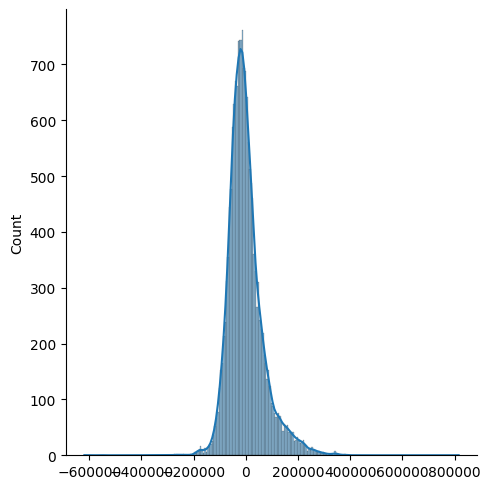

In [ ]:
sns.displot(y-y_hat_pred,kde=True) # actuall - predicted values  this is crrect way

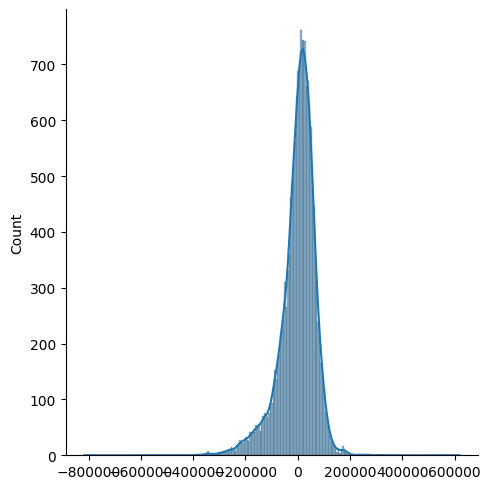

In [100]:
sns.displot(y_hat_pred-y,kde=True)


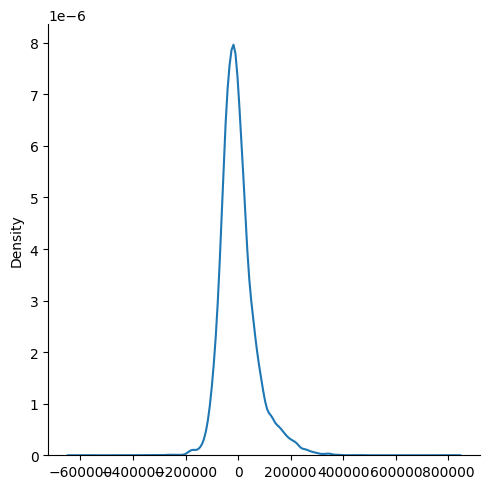

In [95]:
sns.displot(y-y_hat_pred,kind='kde')

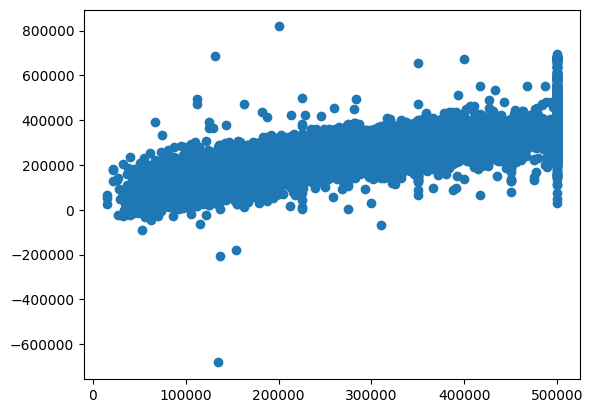

In [99]:
plt.plot(y,y_hat_pred,'o')

In [102]:
from sklearn.metrics import r2_score

In [103]:
r2_score(y,y_hat_pred)

0.648155362842701

In [111]:
y_hat_pred_test = lr.predict(test_df_arr)

In [115]:
y_test = np.array(test_df.median_house_value)
y_test

array([500001., 162500., 204600., ..., 293800., 335700., 215600.])

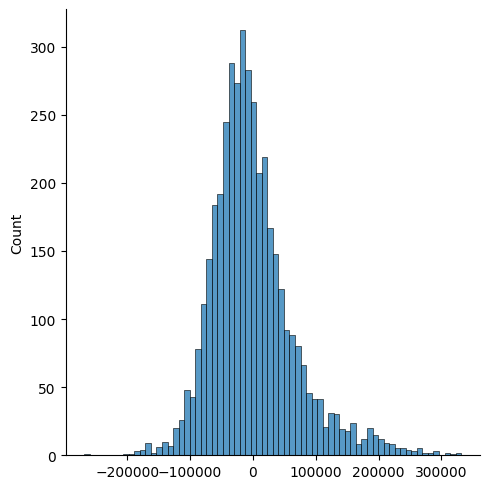

In [ ]:
sns.displot(y_test-y_hat_pred_test)

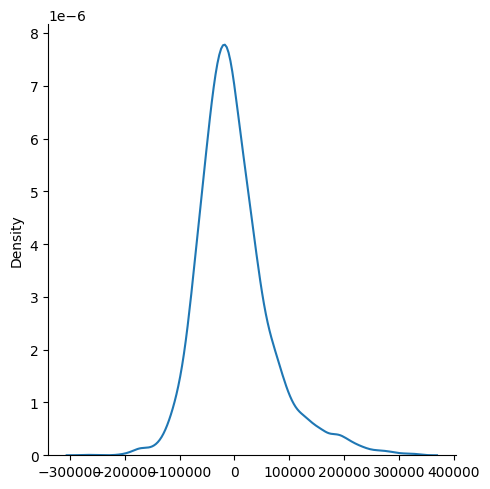

In [118]:
sns.displot(y_test-y_hat_pred_test,kind='kde')


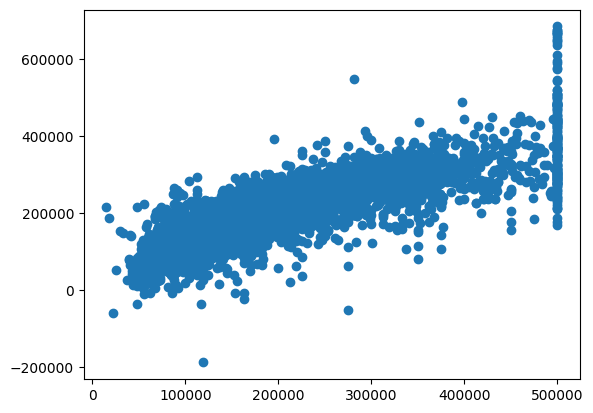

In [120]:
plt.plot(y_test,y_hat_pred_test,'o')

In [ ]:
# predition of Training Dataset
print(f"Training DATA Predition : [ {r2_score(y,y_hat_pred)}  ]")

# Predition of testing Dataset 
print(f"Testing DATA Predition  : [ {r2_score(y_test,y_hat_pred_test)} ]")


# here in both the cases (training and tetsing data) the preditions are similer
# that basically means its a "Generalised Model" here there is no any issue of
# "Over Fitting" and "Under Fitting" scenarois,

Training DATA Predition : [ 0.648155362842701  ]
Testing DATA Predition  : [ 0.6564602720126366 ]


SyntaxError: invalid syntax (2733118536.py, line 1)